In [79]:
import geopandas as gpd
import pandas as pd

In [80]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/RIO GRANDE.dxf', encoding='ANSI_1252')

In [81]:
bairro = 'RIO-GRANDE'

In [82]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [83]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [84]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,AVENIDA ARAGUAIA - 31_12_20 - PHANTOM - DJI_0003,None,AcDbEntity:AcDb2dPolyline,None,550,None,"LINESTRING Z (344090.220 7369512.752 0.000, 34..."
1,RUA RIO ACIMA - 31_12_20 - PHANTOM - DJI_0009 ...,None,AcDbEntity:AcDb2dPolyline,None,55D,None,"LINESTRING Z (343950.068 7369345.834 0.000, 34..."
2,RUA ANTÃNIO CAPUTO - 31_12_20 - PHANTOM - DJI...,None,AcDbEntity:AcDb2dPolyline,None,562,None,"LINESTRING Z (343882.533 7369255.545 0.000, 34..."
3,RUA ANTÃNIO CAPUTO - 31_12_20 - PHANTOM - DJI...,None,AcDbEntity:AcDb2dPolyline,None,569,None,"LINESTRING Z (344180.266 7369365.737 0.000, 34..."
4,RUA JACIPORÃ - 31_12_20 - PHANTOM - DJI_0022 ...,None,AcDbEntity:AcDb2dPolyline,None,580,None,"LINESTRING Z (344625.531 7368749.722 0.000, 34..."
...,...,...,...,...,...,...,...
94,ESTRADA SIMÃO PORTELA - 31_12_20 - PHANTOM - ...,None,AcDbEntity:AcDbPolyline,None,A3A,None,"LINESTRING (344635.432 7369571.680, 344644.737..."
95,RUA ÃNGELA GIANOTO - 31_12_20 - PHANTOM - DJI...,None,AcDbEntity:AcDb2dPolyline,None,A3D,None,"LINESTRING Z (343406.551 7369208.870 0.000, 34..."
96,RUA AUGUSTO PAULINO - 31_12_20 - MAVIC - DJI_0171,None,AcDbEntity:AcDb2dPolyline,None,A4D,None,"LINESTRING Z (343818.543 7369039.076 0.000, 34..."
97,RUA NOSSA SRA. DO CARMO - 31_12_20 - MAVIC - D...,None,AcDbEntity:AcDb2dPolyline,None,A58,None,"LINESTRING Z (344064.046 7369107.855 0.000, 34..."


In [85]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [86]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

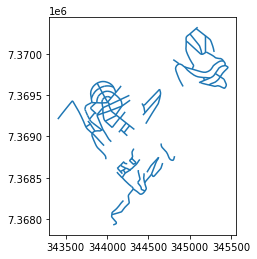

In [87]:
gdf_dxf.plot()

In [88]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('MCT - ', '')

In [89]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [90]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [91]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [92]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [93]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [94]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [95]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer']

64    RUA ALJUBARROTA
66    RUA ALJUBARROTA
68    RUA ALJUBARROTA
69         RUA BUSACO
Name: Layer, dtype: object

In [96]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,AVENIDA ARAGUAIA -,31_12_20,None,- PHANTOM -,None,DJI_0003,,None,None,None
1,RUA RIO ACIMA -,31_12_20,None,- PHANTOM -,None,DJI_0009,-,None,DJI_0010,
2,RUA ANTÔNIO CAPUTO -,31_12_20,None,- PHANTOM -,None,DJI_0008,,None,None,None
3,RUA ANTÔNIO CAPUTO -,31_12_20,None,- PHANTOM -,None,DJI_0008,,None,None,None
4,RUA JACIPORÃ -,31_12_20,None,- PHANTOM -,None,DJI_0022,-,None,DJI_0019,
...,...,...,...,...,...,...,...,...,...,...
94,ESTRADA SIMÃO PORTELA -,31_12_20,None,- PHANTOM -,None,DJI_0042,,None,None,None
95,RUA ÂNGELA GIANOTO -,31_12_20,None,- PHANTOM -,None,DJI_0011,,None,None,None
96,RUA AUGUSTO PAULINO -,31_12_20,None,- MAVIC -,None,DJI_0171,,None,None,None
97,RUA NOSSA SRA. DO CARMO -,31_12_20,None,- MAVIC -,None,DJI_0167,-,None,DJI_0168,


In [58]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].unique()

array([' - PHANTOM - ', '  - PHANTOM - ', ' - MAVIC - ', None],
      dtype=object)

In [59]:
etapas = {
    ' - PHANTOM - ':'etapa_01',
    '  - PHANTOM - ':'etapa_01',
    ' - MAVIC - ':'etapa_02'
}

In [60]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

0     etapa_01
1     etapa_01
2     etapa_01
3     etapa_01
4     etapa_01
        ...   
94    etapa_01
95    etapa_01
96    etapa_02
97    etapa_02
98    etapa_02
Name: 3, Length: 99, dtype: object

In [61]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

In [62]:
gdf_dxf.loc[:, 'etapa']

0     etapa_01
1     etapa_01
2     etapa_01
3     etapa_01
4     etapa_01
        ...   
94    etapa_01
95    etapa_01
96    etapa_02
97    etapa_02
98    etapa_02
Name: etapa, Length: 99, dtype: object

In [63]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,AVENIDA ARAGUAIA - 31_12_20 - PHANTOM - DJI_0003,None,AcDbEntity:AcDb2dPolyline,None,550,None,"LINESTRING Z (344090.220 7369512.752 0.000, 34...","[AVENIDA ARAGUAIA, 31_12_20, PHANTOM, DJI_0003]",[DJI_0003],31_12_20,AVENIDA ARAGUAIA,etapa_01
1,RUA RIO ACIMA - 31_12_20 - PHANTOM - DJI_0009 ...,None,AcDbEntity:AcDb2dPolyline,None,55D,None,"LINESTRING Z (343950.068 7369345.834 0.000, 34...","[RUA RIO ACIMA, 31_12_20, PHANTOM, DJI_0009, D...","[DJI_0009, DJI_0010]",31_12_20,RUA RIO ACIMA,etapa_01
2,RUA ANTÔNIO CAPUTO - 31_12_20 - PHANTOM - DJI_...,None,AcDbEntity:AcDb2dPolyline,None,562,None,"LINESTRING Z (343882.533 7369255.545 0.000, 34...","[RUA ANTÔNIO CAPUTO, 31_12_20, PHANTOM, DJI_0008]",[DJI_0008],31_12_20,RUA ANTÔNIO CAPUTO,etapa_01
3,RUA ANTÔNIO CAPUTO - 31_12_20 - PHANTOM - DJI_...,None,AcDbEntity:AcDb2dPolyline,None,569,None,"LINESTRING Z (344180.266 7369365.737 0.000, 34...","[RUA ANTÔNIO CAPUTO, 31_12_20, PHANTOM, DJI_0008]",[DJI_0008],31_12_20,RUA ANTÔNIO CAPUTO,etapa_01
4,RUA JACIPORÃ - 31_12_20 - PHANTOM - DJI_0022 -...,None,AcDbEntity:AcDb2dPolyline,None,580,None,"LINESTRING Z (344625.531 7368749.722 0.000, 34...","[RUA JACIPORÃ, 31_12_20, PHANTOM, DJI_0022, DJ...","[DJI_0022, DJI_0019]",31_12_20,RUA JACIPORÃ,etapa_01
...,...,...,...,...,...,...,...,...,...,...,...,...
94,ESTRADA SIMÃO PORTELA - 31_12_20 - PHANTOM - D...,None,AcDbEntity:AcDbPolyline,None,A3A,None,"LINESTRING (344635.432 7369571.680, 344644.737...","[ESTRADA SIMÃO PORTELA, 31_12_20, PHANTOM, DJI...",[DJI_0042],31_12_20,ESTRADA SIMÃO PORTELA,etapa_01
95,RUA ÂNGELA GIANOTO - 31_12_20 - PHANTOM - DJI_...,None,AcDbEntity:AcDb2dPolyline,None,A3D,None,"LINESTRING Z (343406.551 7369208.870 0.000, 34...","[RUA ÂNGELA GIANOTO, 31_12_20, PHANTOM, DJI_0011]",[DJI_0011],31_12_20,RUA ÂNGELA GIANOTO,etapa_01
96,RUA AUGUSTO PAULINO - 31_12_20 - MAVIC - DJI_0171,None,AcDbEntity:AcDb2dPolyline,None,A4D,None,"LINESTRING Z (343818.543 7369039.076 0.000, 34...","[RUA AUGUSTO PAULINO, 31_12_20, MAVIC, DJI_0171]",[DJI_0171],31_12_20,RUA AUGUSTO PAULINO,etapa_02
97,RUA NOSSA SRA. DO CARMO - 31_12_20 - MAVIC - D...,None,AcDbEntity:AcDb2dPolyline,None,A58,None,"LINESTRING Z (344064.046 7369107.855 0.000, 34...","[RUA NOSSA SRA. DO CARMO, 31_12_20, MAVIC, DJI...","[DJI_0167, DJI_0168]",31_12_20,RUA NOSSA SRA. DO CARMO,etapa_02


In [64]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [65]:
pd_videos

,Video_0,Video_1
0,DJI_0003.MOV,None
1,DJI_0009.MOV,DJI_0010.MOV
2,DJI_0008.MOV,None
3,DJI_0008.MOV,None
4,DJI_0022.MOV,DJI_0019.MOV
...,...,...
94,DJI_0042.MOV,None
95,DJI_0011.MOV,None
96,DJI_0171.MOV,None
97,DJI_0167.MOV,DJI_0168.MOV


In [66]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [67]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1'],
      dtype='object')

In [68]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [69]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [70]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [71]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [72]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.data_voo + gdf_dxf.etapa + gdf_dxf[c]

In [73]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [74]:
gdf_dxf.crs = 'epsg:31983'

In [75]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,AVENIDA AMAZONAS - 31_12_20 - PHANTOM - DJI_0001,"LINESTRING Z (344106.410 7369531.573 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,None,590,None,"[AVENIDA AMAZONAS, 31_12_20, PHANTOM, DJI_0001]",[DJI_0001],31_12_20/,AVENIDA AMAZONAS,etapa_01/,DJI_0001.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0001.MOV,NaN
1,AVENIDA ARAGUAIA - 31_12_20 - PHANTOM - DJI_0003,MULTILINESTRING Z ((344090.220 7369512.752 0.0...,None,AcDbEntity:AcDb2dPolyline,None,550,None,"[AVENIDA ARAGUAIA, 31_12_20, PHANTOM, DJI_0003]",[DJI_0003],31_12_20/,AVENIDA ARAGUAIA,etapa_01/,DJI_0003.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0003.MOV,NaN
2,AVENIDA DA PRAIA - 31_12_20 - PHANTOM - DJI_0007,MULTILINESTRING Z ((343882.124 7369643.345 0.0...,None,AcDbEntity:AcDb2dPolyline,None,5AD,None,"[AVENIDA DA PRAIA, 31_12_20 , PHANTOM, DJI_0007]",[DJI_0007],31_12_20/,AVENIDA DA PRAIA,etapa_01/,DJI_0007.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0007.MOV,NaN
3,AVENIDA IVAÍ - 31_12_20 - PHANTOM - DJI_0004,MULTILINESTRING Z ((344010.974 7369481.144 0.0...,None,AcDbEntity:AcDbCircle:AcDbArc,None,5B5,None,"[AVENIDA IVAÍ , 31_12_20, PHANTOM, DJI_0004]",[DJI_0004],31_12_20/,AVENIDA IVAÍ,etapa_01/,DJI_0004.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0004.MOV,NaN
4,AVENIDA TOCANTIS - 31_12_20 - PHANTOM - DJI_0002,MULTILINESTRING Z ((343973.293 7369606.524 0.0...,None,AcDbEntity:AcDbCircle:AcDbArc,None,5BD,None,"[AVENIDA TOCANTIS, 31_12_20, PHANTOM, DJI_0002]",[DJI_0002],31_12_20/,AVENIDA TOCANTIS,etapa_01/,DJI_0002.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0002.MOV,NaN
5,ESTRADA SIMÃO PORTELA - 31_12_20 - PHANTOM - D...,MULTILINESTRING Z ((344656.922 7368914.197 0.0...,None,AcDbEntity:AcDb2dPolyline,None,634,None,"[ESTRADA SIMÃO PORTELA, 31_12_20, PHANTOM, DJI...",[DJI_0042],31_12_20/,ESTRADA SIMÃO PORTELA,etapa_01/,DJI_0042.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0042.MOV,NaN
6,HEINRICH NORDOFF - 31_12_20 - PHANTOM - DJI_0005,MULTILINESTRING Z ((344170.743 7369610.584 0.0...,None,AcDbEntity:AcDb2dPolyline,None,84E,None,"[HEINRICH NORDOFF, 31_12_20, PHANTOM, DJI_0005]",[DJI_0005],31_12_20/,HEINRICH NORDOFF,etapa_01/,DJI_0005.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0005.MOV,NaN
7,PASSAGEM 14 DE ABRIL - 31_12_20 - PHANTOM - DJ...,"LINESTRING Z (344184.698 7368501.550 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,None,6E8,None,"[PASSAGEM 14 DE ABRIL, 31_12_20, PHANTOM, DJI_...",[DJI_0030],31_12_20/,PASSAGEM 14 DE ABRIL,etapa_01/,DJI_0030.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0030.MOV,NaN
8,PASSAGEM ANÁPOLIS - 31_12_20 - PHANTOM - DJI_0023,MULTILINESTRING Z ((344121.061 7368568.711 0.0...,None,AcDbEntity:AcDb2dPolyline,None,6C4,None,"[PASSAGEM ANÁPOLIS, 31_12_20, PHANTOM, DJI_0023]",[DJI_0023],31_12_20/,PASSAGEM ANÁPOLIS,etapa_01/,DJI_0023.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0023.MOV,NaN
9,PASSAGEM TROPICAL - 31_12_20 - PHANTOM - DJI_0024,"LINESTRING Z (344124.748 7368612.637 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,None,900,None,"[PASSAGEM TROPICAL, 31_12_20, PHANTOM, DJI_0024]",[DJI_0024],31_12_20/,PASSAGEM TROPICAL,etapa_01/,DJI_0024.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0024.MOV,NaN


In [76]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,"LINESTRING Z (344106.410 7369531.573 0.000, 34...",31_12_20/,AVENIDA AMAZONAS,etapa_01/,DJI_0001.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0001.MOV,NaN
1,MULTILINESTRING Z ((344090.220 7369512.752 0.0...,31_12_20/,AVENIDA ARAGUAIA,etapa_01/,DJI_0003.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0003.MOV,NaN
2,MULTILINESTRING Z ((343882.124 7369643.345 0.0...,31_12_20/,AVENIDA DA PRAIA,etapa_01/,DJI_0007.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0007.MOV,NaN
3,MULTILINESTRING Z ((344010.974 7369481.144 0.0...,31_12_20/,AVENIDA IVAÍ,etapa_01/,DJI_0004.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0004.MOV,NaN
4,MULTILINESTRING Z ((343973.293 7369606.524 0.0...,31_12_20/,AVENIDA TOCANTIS,etapa_01/,DJI_0002.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0002.MOV,NaN
5,MULTILINESTRING Z ((344656.922 7368914.197 0.0...,31_12_20/,ESTRADA SIMÃO PORTELA,etapa_01/,DJI_0042.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0042.MOV,NaN
6,MULTILINESTRING Z ((344170.743 7369610.584 0.0...,31_12_20/,HEINRICH NORDOFF,etapa_01/,DJI_0005.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0005.MOV,NaN
7,"LINESTRING Z (344184.698 7368501.550 0.000, 34...",31_12_20/,PASSAGEM 14 DE ABRIL,etapa_01/,DJI_0030.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0030.MOV,NaN
8,MULTILINESTRING Z ((344121.061 7368568.711 0.0...,31_12_20/,PASSAGEM ANÁPOLIS,etapa_01/,DJI_0023.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0023.MOV,NaN
9,"LINESTRING Z (344124.748 7368612.637 0.000, 34...",31_12_20/,PASSAGEM TROPICAL,etapa_01/,DJI_0024.MOV,None,videos/rio_grande/31_12_20/etapa_01/DJI_0024.MOV,NaN


In [77]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [78]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_0_path      object
Video_1_path      object
dtype: object